<a href="https://colab.research.google.com/github/gadi-goren/karatsuba/blob/main/notebooks/karatsuba_multiply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
See GitHub code [gadi-goren/karatsuba](https://github.com/gadi-goren/karatsuba)

This notebook follows the wonderfull YouTube: [ The Genius Way Computers Multiply Big Numbers
](https://www.youtube.com/watch?v=AMl6EJHfUWo&list=LL) created by [PurpleMind](https://www.youtube.com/@PurpleMindCS)

It explores two multiplication algorithms: The Karatsuba algorithm and the naive approach.

We will implement both algorithms in Python, analyze their time complexity, and compare their performance against Python's built-in multiplication.


### Time Complexity
The time complexity of the naive multiplication algorithm is **O(n^2)**, where n is the number of digits in the numbers being multiplied.

The time complexity of the Karatsuba algorithm is **O(n^log2(3))**, which is approximately O(n^1.585). This is an improvement over the naive algorithm's O(n^2) complexity.


### Karatsuba Algorithm
The Karatsuba algorithm is a divide-and-conquer algorithm that reduces the number of multiplications required to multiply two numbers. It achieves this by unique math (explaind in the video) and recursively breaking down the multiplication into smaller subproblems.


In [1]:
def naive_multiply(num1, num2):
    '''
    Recursive function to naively multiply 2 numbers.
    Breaks down the multiplication of two large numbers into smaller multiplications,
    solves those recursively, then combines the results to get the final product.
    This approach is based on the principle of divide and conquer.

    Args:
      num1, num2: The numbers to multiply.

    Returns:
      The multiplication of num1 * num2.
    '''

    # Recursion stop, if both numbers are less than 2 do a bitwise AND operation (&) between them and return the result.
    # handles the simplest cases (0 * 0, 0 * 1, 1 * 0, 1 * 1)
    if num1 < 2 and num2 < 2:
      return num1 & num2

    # Calculating the Split Point:

    # n is the maximum digit length of the binary representations of num1 and num2 without the '0b' prefix.
    # The -2 is to remove the 0b prefix from the binary representation (e.g., bin(5) is 0b101).
    n = max(len(bin(num1)) - 2, len(bin(num2)) - 2)

    # mid is half of n, which will be used to split the numbers into parts.
    mid = n // 2

    # Splitting the Numbers:
    # a and c: The left halves of num1 and num2 respectively, obtained by right-shifting (>>) the numbers by mid bits.
    # b and d: The right halves of num1 and num2 respectively, obtained by performing a bitwise AND (&) with a mask ((1 << mid) - 1).
    # This mask essentially extracts the lower mid bits.
    a, b = num1 >> mid, num1 & ((1 << mid) - 1)
    c, d = num2 >> mid, num2 & ((1 << mid) - 1)

    # Recursive Multiplication
    # the function calls itself recursively to calculate the products of the split parts: ac, bd, ad, and bc
    ac = naive_multiply(a, c)
    bd = naive_multiply(b, d)
    ad = naive_multiply(a, d)
    bc = naive_multiply(b, c)

    # Combining the Results:
    ad_plus_be = ad + bc
    # result is obtained by combining the partial products, shifting them appropriately using left-shift (<<) operations
    # to place them in the correct positions, and adding them together.
    result = (ac << (mid << 1)) + (ad_plus_be << mid) + bd
    return result

print(naive_multiply(1, 0))
print(naive_multiply(2, 3))
print(naive_multiply(3, 4))
print(naive_multiply(7, 9))

0
6
12
63


In [2]:
def karatsuba_multiply(num1, num2):
    '''
    The Karatsuba algorithm is a "divide and conquer" approach to multiplication.
    It breaks down the multiplication of two large numbers into smaller multiplications,
    solves those recursively, and then combines the results efficiently to get the final product.

    Args:
      num1, num2: The numbers to multiply.

    Returns:
      The multiplication of num1 * num2.
    '''

    # Recursion stop, if both numbers are less than 2 do a bitwise AND operation (&) between them and return the result.
    # handles the simplest cases (0 * 0, 0 * 1, 1 * 0, 1 * 1)
    if num1 < 2 and num2 < 2:
      return num1 & num2

    # Calculating the Split Point:

    # n is the maximum digit length of the binary representations of num1 and num2 without the '0b' prefix.
    # The -2 is to remove the 0b prefix from the binary representation (e.g., bin(5) is 0b101).
    n = max(len(bin(num1)) - 2, len(bin(num2)) - 2)

    # mid is half of n, which will be used to split the numbers into parts.
    mid = n // 2

    # Splitting the Numbers:
    # a and c: The left halves of num1 and num2 respectively, obtained by right-shifting (>>) the numbers by mid bits.
    # b and d: The right halves of num1 and num2 respectively, obtained by performing a bitwise AND (&) with a mask ((1 << mid) - 1).
    # This mask essentially extracts the lower mid bits.
    a, b = num1 >> mid, num1 & ((1 << mid) - 1)
    c, d = num2 >> mid, num2 & ((1 << mid) - 1)

    # Recursive Multiplication:
    # the function calls itself recursively to calculate the products of the split parts: ac, bd, ad, and bc
    ac = karatsuba_multiply(a, c)
    bd = karatsuba_multiply(b, d)

    # Combining the Results:
    ad_plus_bc = karatsuba_multiply(a+b, c+d) - ac -bd
    # result is obtained by combining the partial products, shifting them appropriately using left-shift (<<) operations
    # to place them in the correct positions, and adding them together.
    result = (ac << (mid << 1)) + (ad_plus_bc << mid) + bd
    return result

print(karatsuba_multiply(1, 2))
print(karatsuba_multiply(2, 3))
print(karatsuba_multiply(3, 4))
print(karatsuba_multiply(7, 9))

2
6
12
63


In [3]:
import time
import random

def measure_multiplication_time(n, multiply_func):
  """
  Measures the time it takes to multiply two numbers with n digits using a given multiplication function.

  Args:
    n: The number of digits for each number.
    multiply_func: The multiplication function to use (e.g., naive_multiply, karatsuba_multiply).

  Returns:
    The time taken in seconds.
  """

  # Generate two numbers with n digits. ** is the exponent function
  num1 = random.randrange(10**(n-1), 10**n)
  num2 = random.randrange(10**(n-1), 10**n)

  start_time = time.time()
  result = multiply_func(num1, num2)
  end_time = time.time()

  return end_time - start_time

print(measure_multiplication_time(70, naive_multiply))
print(measure_multiplication_time(70, karatsuba_multiply))
print(measure_multiplication_time(70, lambda x, y: x * y)) # python built in multiplication function

0.13678956031799316
0.03824877738952637
1.430511474609375e-06


In [4]:
def run_and_measure(n_values, multiply_funcs):
    """
    Runs measure_multiplication_time for a range of n values and multiple functions.

    Args:
        n_values: A list of n values to test.
        multiply_funcs: A dictionary where keys are function names (strings)
                         and values are the function references.

    Returns:
        A dictionary where keys are function names and values are lists of execution times
        corresponding to each n value.
    """
    results = {}
    for func_name, func in multiply_funcs.items():
        results[func_name] = []
        for n in n_values:
            time_taken = measure_multiplication_time(n, func)
            results[func_name].append(time_taken)
    return results

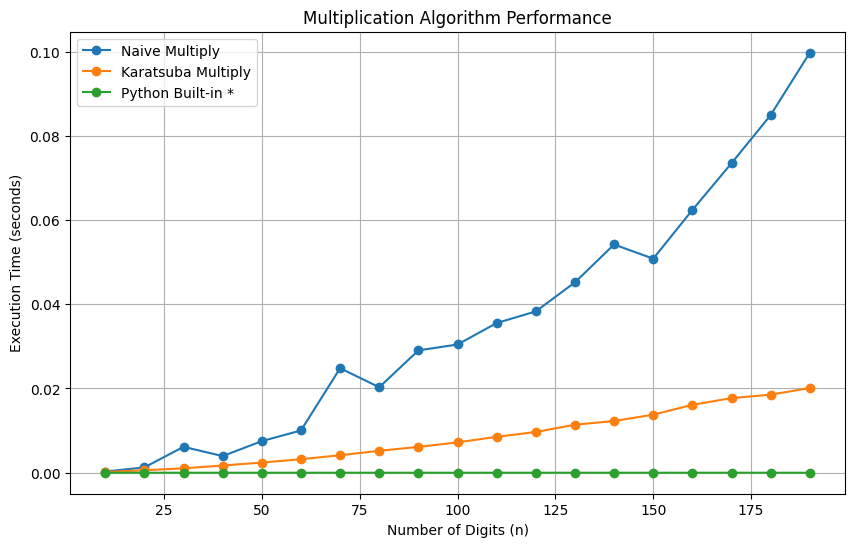

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random

def generate_chart(results, n_values):
    """Generates a chart from the results of run_and_measure."""
    plt.figure(figsize=(10, 6))
    for func_name, times in results.items():
        plt.plot(n_values, times, label=func_name, marker='o')

    plt.xlabel("Number of Digits (n)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Multiplication Algorithm Performance")
    plt.legend()
    plt.grid(True)
    plt.show()

n_values = list(range(10, 200, 10))  # Example n values
multiply_funcs = {
    "Naive Multiply": naive_multiply,
    "Karatsuba Multiply": karatsuba_multiply,
    "Python Built-in *": lambda x, y: x * y
}

results = run_and_measure(n_values, multiply_funcs)
generate_chart(results, n_values)

In [9]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def generate_chart_log(results, n_values, log_y):
    """Generates a chart from the results of run_and_measure with a log y-axis option."""
    plt.figure(figsize=(10, 6))
    for func_name, times in results.items():
        plt.plot(n_values, times, label=func_name, marker='o')

    plt.xlabel("Number of Digits (n)")
    plt.ylabel(f"Execution Time (seconds) {'[log scale '+str(log_y)+']' if log_y > 1 else ''}") # Update ylabel
    plt.title("Multiplication Algorithm Performance")
    plt.legend()
    plt.grid(True)

    if log_y > 1:
        plt.yscale('log', base=log_y) # Apply log scale if log_y > 1

    plt.show()


# Create the slider widget
log_slider = widgets.IntSlider(min=1, max=10, step=1, value=1, description='Y-axis Log:')

# Create an output widget to display the chart
output = widgets.Output()


def update_chart(change):
    with output:
        clear_output(wait=True)
        generate_chart_log(results, n_values, log_slider.value) # Update chart with slider value

# Observe changes in the slider
log_slider.observe(update_chart, names='value')

# Display the slider and output
display(log_slider, output)

# Initial chart display
update_chart(None) # Trigger initial plot

IntSlider(value=1, description='Y-axis Log:', max=10, min=1)

Output()

In [7]:
def naive_multiply_verbose(num1, num2, depth=0):
    '''
    Recursive function to naively multiply 2 numbers.
    Breaks down the multiplication of two large numbers into smaller multiplications,
    solves those recursively, then combines the results to get the final product.
    This approach is based on the principle of divide and conquer.

    Args:
      num1, num2: The numbers to multiply.

    Returns:
      The multiplication of num1 * num2.
    '''
    global count
    count+=1
    print("\t"*depth, end='')
    print(f"Multiplying {num1}[{bin(num1)[2:]}] and {num2}[{bin(num2)[2:]}]\t" , end='')

    # Recursion stop, if both numbers are less than 2 do a bitwise AND operation (&) between them and return the result.
    # handles the simplest cases (0 * 0, 0 * 1, 1 * 0, 1 * 1)
    if num1 < 2 and num2 < 2:
      print(f"\trecursion stop")
      return num1 & num2

    # Calculating the Split Point:

    # n is the maximum digit length of the binary representations of num1 and num2 without the '0b' prefix.
    # The -2 is to remove the 0b prefix from the binary representation (e.g., bin(5) is 0b101).
    n = max(len(bin(num1)) - 2, len(bin(num2)) - 2)

    # mid is half of n, which will be used to split the numbers into parts.
    mid = n // 2

    # Splitting the Numbers:
    # a and c: The left halves of num1 and num2 respectively, obtained by right-shifting (>>) the numbers by mid bits.
    # b and d: The right halves of num1 and num2 respectively, obtained by performing a bitwise AND (&) with a mask ((1 << mid) - 1).
    # This mask essentially extracts the lower mid bits.
    a, b = num1 >> mid, num1 & ((1 << mid) - 1)
    c, d = num2 >> mid, num2 & ((1 << mid) - 1)
    print(f"\tn={n}\tmid={mid}\ta={a}[{bin(a)[2:]}]\t b={b}[{bin(b)[2:]}]\tc={c}[{bin(c)[2:]}]\td={d}[{bin(d)[2:]}]")

    # Recursive Multiplication
    # the function calls itself recursively to calculate the products of the split parts: ac, bd, ad, and bc
    ac = naive_multiply_verbose(a, c, depth=depth+1)
    bd = naive_multiply_verbose(b, d, depth=depth+1)
    ad = naive_multiply_verbose(a, d, depth=depth+1)
    bc = naive_multiply_verbose(b, c, depth=depth+1)

    # Combining the Results:
    ad_plus_be = ad + bc
    # result is obtained by combining the partial products, shifting them appropriately using left-shift (<<) operations
    # to place them in the correct positions, and adding them together.
    result = (ac << (mid << 1)) + (ad_plus_be << mid) + bd



    return result

count=0
print(f"result={str(naive_multiply_verbose(7, 5))} steps={count}")


Multiplying 7[111] and 5[101]		n=3	mid=1	a=3[11]	 b=1[1]	c=2[10]	d=1[1]
	Multiplying 3[11] and 2[10]		n=2	mid=1	a=1[1]	 b=1[1]	c=1[1]	d=0[0]
		Multiplying 1[1] and 1[1]		recursion stop
		Multiplying 1[1] and 0[0]		recursion stop
		Multiplying 1[1] and 0[0]		recursion stop
		Multiplying 1[1] and 1[1]		recursion stop
	Multiplying 1[1] and 1[1]		recursion stop
	Multiplying 3[11] and 1[1]		n=2	mid=1	a=1[1]	 b=1[1]	c=0[0]	d=1[1]
		Multiplying 1[1] and 0[0]		recursion stop
		Multiplying 1[1] and 1[1]		recursion stop
		Multiplying 1[1] and 1[1]		recursion stop
		Multiplying 1[1] and 0[0]		recursion stop
	Multiplying 1[1] and 2[10]		n=2	mid=1	a=0[0]	 b=1[1]	c=1[1]	d=0[0]
		Multiplying 0[0] and 1[1]		recursion stop
		Multiplying 1[1] and 0[0]		recursion stop
		Multiplying 0[0] and 0[0]		recursion stop
		Multiplying 1[1] and 1[1]		recursion stop
result=35 steps=17
